In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [70]:
from sklearn.model_selection import train_test_split
import folium
from folium.plugins import FastMarkerCluster
import re
from datetime import datetime


In [71]:
df = pd.read_csv("../data/listings.csv.gz",compression="gzip")

In [72]:
df.shape

(8739, 75)

## 1) Splitting the dataset into 70-15-15 ratio

In [73]:
df_full_train,df_test = train_test_split(df,test_size=0.15,random_state=810)
df_train,df_df_val = train_test_split(df_full_train,test_size=0.15,random_state=810)

In [74]:
print("Dataset shape when train and validation is combined",df_full_train.shape)
print("Dataset shape of the test dataset",df_test.shape)

Dataset shape when train and validation is combined (7428, 75)
Dataset shape of the test dataset (1311, 75)


## 2) Data Preprocessing

In [75]:
df_full_train.head().T

,5106,5961,7311,1213,2387
id,1020339493261692070,991906029869083109,800065755352436194,1012266793074500896,29923896
listing_url,https://www.airbnb.com/rooms/1020339493261692070,https://www.airbnb.com/rooms/991906029869083109,https://www.airbnb.com/rooms/800065755352436194,https://www.airbnb.com/rooms/1012266793074500896,https://www.airbnb.com/rooms/29923896
scrape_id,20231212015436,20231212015436,20231212015436,20231212015436,20231212015436
last_scraped,2023-12-12,2023-12-12,2023-12-12,2023-12-12,2023-12-12
source,city scrape,previous scrape,city scrape,city scrape,city scrape
...,...,...,...,...,...
calculated_host_listings_count,2,1,1,1,3
calculated_host_listings_count_entire_homes,2,1,1,1,0
calculated_host_listings_count_private_rooms,0,0,0,0,3
calculated_host_listings_count_shared_rooms,0,0,0,0,0


In [76]:
df_full_train.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [77]:
cat_features = list((df_full_train.dtypes[df_full_train.dtypes=="object"]).index)
print(len(cat_features))
print(cat_features)

34
['listing_url', 'last_scraped', 'source', 'name', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'license', 'instant_bookable']


In [78]:
df_full_train.columns = df_full_train.columns.str.replace(" ","_").str.lower()
for col in cat_features:
    df_full_train[col] = df_full_train[col].str.replace(" ","_").str.lower()

In [79]:
all_features = list(df_full_train.columns)
print(len(all_features))

75


In [80]:
for col in all_features:
    print(col)
    print(df_full_train[col].nunique())
    print(df_full_train[col].unique()[:5])
    print("----------------------------------------------------------------------------------")

id
7428
[1020339493261692070  991906029869083109  800065755352436194
 1012266793074500896            29923896]
----------------------------------------------------------------------------------
listing_url
7428
['https://www.airbnb.com/rooms/1020339493261692070'
 'https://www.airbnb.com/rooms/991906029869083109'
 'https://www.airbnb.com/rooms/800065755352436194'
 'https://www.airbnb.com/rooms/1012266793074500896'
 'https://www.airbnb.com/rooms/29923896']
----------------------------------------------------------------------------------
scrape_id
1
[20231212015436]
----------------------------------------------------------------------------------
last_scraped
2
['2023-12-12' '2023-12-13']
----------------------------------------------------------------------------------
source
2
['city_scrape' 'previous_scrape']
----------------------------------------------------------------------------------
name
3256
['rental_unit_in_amsterdam_·_★new_·_1_bedroom_·_1_bed_·_1_bath'
 'rental_unit_in_ams

In [81]:
#Few columns have information regarding scrap so they are irrelevant to the problem statement.
#columns related to scrap are :  scrape_id, last_scraped, source, calendar_last_scraped

In [82]:
#Rows having alot of unique value and does not contain much information regarding the pricing of the house are irrelevant as well.
#Columns are : id, listing_url, name, description, picture_url, host_id, host_url, host_name, host_location, host_thumbnail_url, host_picture_url, host_verifications, host_has_profile_pic, host_identity_verified,neighbourhood_group_cleansed, amenities
                #bathrooms,minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm, calendar_updated
                #has_availability, availability_30, availability_60, availability_90, availability_365, first_review, last_review, license, calculated_host_listings_count, calculated_host_listings_count_entire_homes,
                #calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms

In [83]:
#Columns that might be interesting but not sure to be used or not
#Columns : neighborhood_overview, host_about, host_response_rate, host_neighbourhood, host_total_listings_count, host_total_listings_count, property_type, maximum_nights, number_of_reviews_ltm, number_of_reviews_l30d,
            #review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, instant_bookable,  minimum_nights,host_acceptance_rate, reviews_per_month, 

In [84]:
#Columns to be used to model the problem statement
#columns: host_since, host_is_superhost, neighbourhood_cleansed, latitude, longitude, room_type, accommodates, bathrooms_text, price, number_of_reviews, review_scores_rating, host_listings_count

In [85]:
columns = ["host_since", "host_is_superhost","host_listings_count","neighbourhood_cleansed", "latitude", "longitude", "room_type", "accommodates", "bathrooms_text", "beds", "price", "number_of_reviews", "review_scores_rating","availability_365","minimum_nights"]
df_filter_full_train = df_full_train[columns]

In [86]:
df_filter_full_train.head().T

,5106,5961,7311,1213,2387
host_since,2023-07-28,2014-10-23,2014-04-08,2015-05-26,2017-10-30
host_is_superhost,f,f,f,f,t
host_listings_count,2,1,1,1,4
neighbourhood_cleansed,ijburg_-_zeeburgereiland,centrum-oost,de_baarsjes_-_oud-west,oud-oost,centrum-west
latitude,52.361914,52.36876,52.364833,52.351616,52.37988
longitude,4.988083,4.928422,4.876748,4.912425,4.88459
room_type,entire_home/apt,entire_home/apt,entire_home/apt,entire_home/apt,private_room
accommodates,2,2,2,3,2
bathrooms_text,1_bath,1.5_baths,1_bath,1_bath,1_private_bath
beds,1.0,1.0,1.0,2.0,1.0


In [87]:
print("Number of duplicate values in the dataset are", df_filter_full_train.duplicated().sum())
df_filter_full_train.drop_duplicates(inplace=True)

Number of duplicate values in the dataset are 1


In [88]:
df_filter_full_train.isna().sum()

host_since                  0
host_is_superhost          42
host_listings_count         0
neighbourhood_cleansed      0
latitude                    0
longitude                   0
room_type                   0
accommodates                0
bathrooms_text              6
beds                       61
price                     254
number_of_reviews           0
review_scores_rating      778
availability_365            0
minimum_nights              0
dtype: int64

#### 2.1) Cleaning "price" column

In [89]:
#Cleaning price column
print("Number of NaN values are ", df_filter_full_train.price.isna().sum())
df_filter_full_train.dropna(subset=['price'], inplace=True)
def remove_dollar_sign(text):
    text = str(text)
    numeric_text = text.replace("$","").replace(",","")
    return float(numeric_text)
df_filter_full_train.price =  df_filter_full_train["price"].apply(remove_dollar_sign)

Number of NaN values are  254


#### 2.2) Cleaning "bathroom_text" column

In [90]:
df_filter_full_train.bathrooms_text.isna().sum()

6

In [91]:
print("Number of bed rooms count per bathroom number \n",df_filter_full_train.groupby("beds").bathrooms_text.value_counts())
print("-------------------------------------------------------------------------------------------------------------------------")
print("Number of beds in the Airbnb listing for which bathroom text is missing \n",df_filter_full_train[df_filter_full_train.bathrooms_text.isna()]["beds"])

Number of bed rooms count per bathroom number 
 beds  bathrooms_text  
1.0   1_bath              2132
      1.5_baths            927
      1_private_bath       408
      1_shared_bath        200
      1.5_shared_baths     109
                          ... 
22.0  2.5_baths              1
24.0  5.5_baths              3
26.0  2.5_baths              1
30.0  17_baths               1
33.0  3_baths                1
Name: count, Length: 102, dtype: int64
-------------------------------------------------------------------------------------------------------------------------
Number of beds in the Airbnb listing for which bathroom text is missing 
 312     1.0
8173    1.0
3845    1.0
2811    1.0
8319    3.0
5611    4.0
Name: beds, dtype: float64


In [92]:
#Since the missing bathrooms text have smaller number of beds, hence number of beds is being filled in missing bathroom text
df_filter_full_train["bathrooms_text"].fillna(df_filter_full_train["beds"], inplace=True)

In [93]:
#creating a new columns to check if the bathroom is shared or not and converting bathrooms_text into a float columns
def bathroom_number(text):
    text = str(text)
    if "half" in text:
        return 0.5
    else:
        number = re.findall(r'\d+\.\d+|\d+', text)
    return float(number[0])
df_filter_full_train["bathrooms"] = df_filter_full_train["bathrooms_text"].apply(bathroom_number)
df_filter_full_train["private"] = df_filter_full_train["bathrooms_text"].apply(lambda x:0 if "shared" in str(x) else 1)

In [94]:
del df_filter_full_train["bathrooms_text"]

#### 2.3) Cleaning "host" columns

In [95]:
# Filling NAN values in super host column as normal host
df_filter_full_train.host_is_superhost.fillna("f",inplace = True)


In [96]:
# Changing the "host since" column to number of days from today.
df_filter_full_train["host_since"] = pd.to_datetime(df_filter_full_train["host_since"])
df_filter_full_train["host_since"] = ((pd.Timestamp(datetime.today().date())) - df_filter_full_train["host_since"]).dt.days

#### 2.4) Review score rating

In [97]:
df_filter_full_train.review_scores_rating.isna().sum()

663

In [98]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=810)
df_filter_full_train["review_scores_rating"] = imputer.fit_transform(df_filter_full_train[["review_scores_rating"]])

In [99]:
c = df_filter_full_train[df_filter_full_train.accommodates == 2]

#### 2.5) Filling NAN values of "bed" columns

In [100]:
df_filter_full_train.groupby("accommodates").beds.value_counts()

accommodates  beds
1             1.0      162
              2.0       10
              4.0        3
              3.0        1
2             1.0     3426
                      ... 
16            18.0       1
              22.0       1
              26.0       1
              30.0       1
              33.0       1
Name: count, Length: 65, dtype: int64

In [101]:
print("1 bed required by guests having 2 accommodates :",df_filter_full_train[(df_filter_full_train["beds"] == 1) & (df_filter_full_train["accommodates"] == 2)].shape[0])
print("Number of beds required by guests having 2 accommodates :",df_filter_full_train[(df_filter_full_train["beds"] > 1) & (df_filter_full_train["accommodates"] == 2)].shape[0])
print("2 beds required by guests having 4 accommodates :",df_filter_full_train[(df_filter_full_train["beds"] == 2) & (df_filter_full_train["accommodates"] == 4)].shape[0])
print("Number of beds required by guests having 4 accommodates :",df_filter_full_train[(df_filter_full_train["beds"] > 2) & (df_filter_full_train["accommodates"] == 4)].shape[0])

1 bed required by guests having 2 accommodates : 3426
Number of beds required by guests having 2 accommodates : 335
2 beds required by guests having 4 accommodates : 1228
Number of beds required by guests having 4 accommodates : 940


In [102]:
df_filter_full_train[df_filter_full_train["beds"].isna()]["accommodates"][:5]

6988    2
697     2
87      4
2063    4
7552    2
Name: accommodates, dtype: int64

In [103]:
## Since most of the missing values of the bed are less i.e below 5. And as we saw earlier beds are usually half of accommodates so we follow the same pattern while filling the NA values of bed
df_filter_full_train["beds"].fillna(round((df_filter_full_train["accommodates"])/2),inplace=True)
df_filter_full_train["beds"] = df_filter_full_train["beds"].astype("int")

In [104]:
df_filter_full_train.isna().sum()

host_since                0
host_is_superhost         0
host_listings_count       0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
room_type                 0
accommodates              0
beds                      0
price                     0
number_of_reviews         0
review_scores_rating      0
availability_365          0
minimum_nights            0
bathrooms                 0
private                   0
dtype: int64

## 3)EDA 

#### 3.1) Price

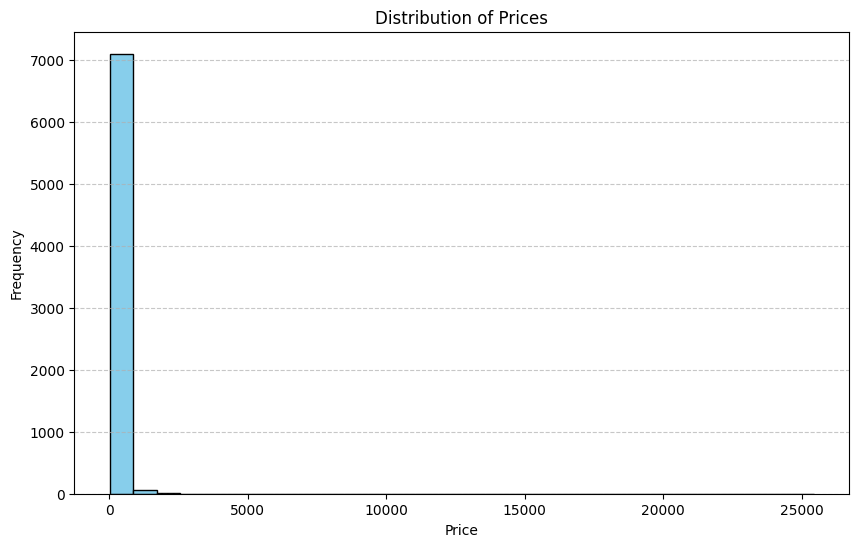

In [105]:
plt.figure(figsize=(10, 6))
plt.hist(df_filter_full_train['price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [106]:
#data seems to have outliers so removing all the rows that have price more than 2000 per night
df_filter_full_train = df_filter_full_train[df_filter_full_train["price"] <= 2000]

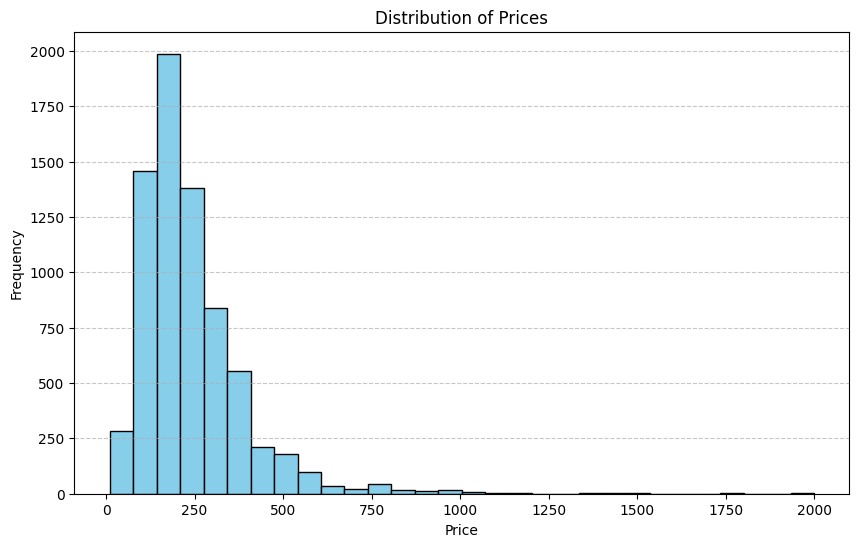

In [107]:
plt.figure(figsize=(10, 6))
plt.hist(df_filter_full_train['price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 3.2) Neighbourhoods

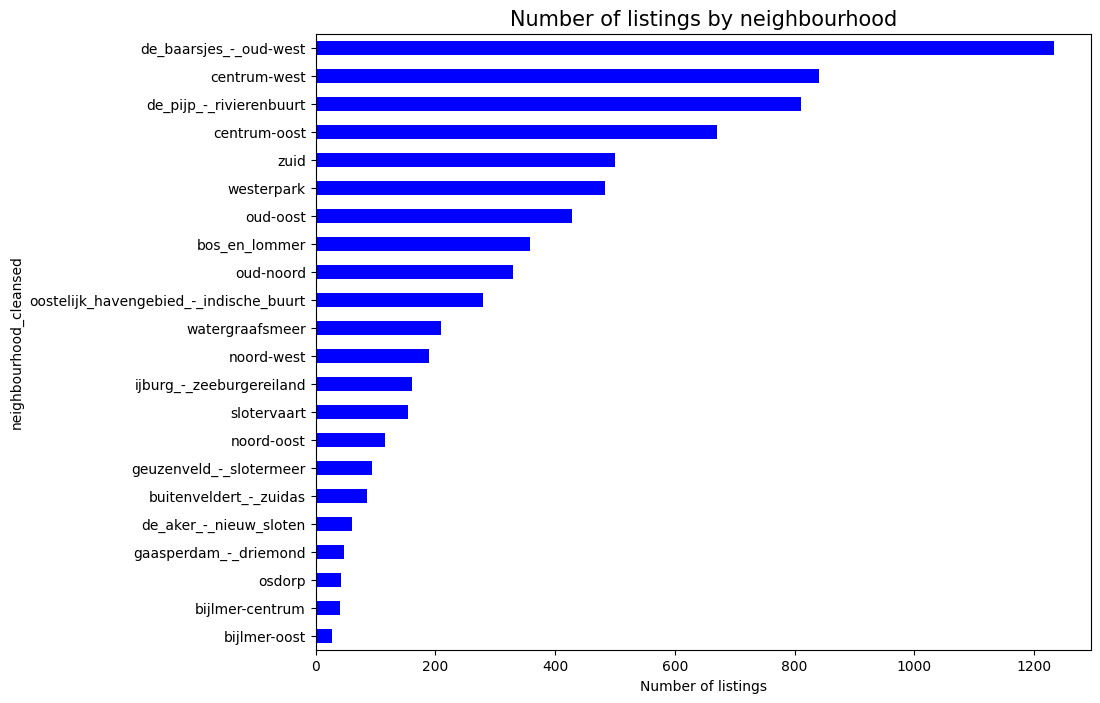

In [108]:
nei_frequency = df_filter_full_train["neighbourhood_cleansed"].value_counts().sort_values(ascending=True)
nei_frequency.plot.barh(figsize=(10,8),color = "b", width=0.5)
plt.title("Number of listings by neighbourhood", fontsize=15)
plt.xlabel("Number of listings",fontsize=10)
plt.show()

In [109]:
lats = df_filter_full_train["latitude"].tolist()
lons = df_filter_full_train["longitude"].tolist()
locations = list(zip(lats,lons))
map1 = folium.Map(location=[52.38, 4.9],zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [110]:
#most of the places are location near to the city centre

#### 2.3) Room and property types

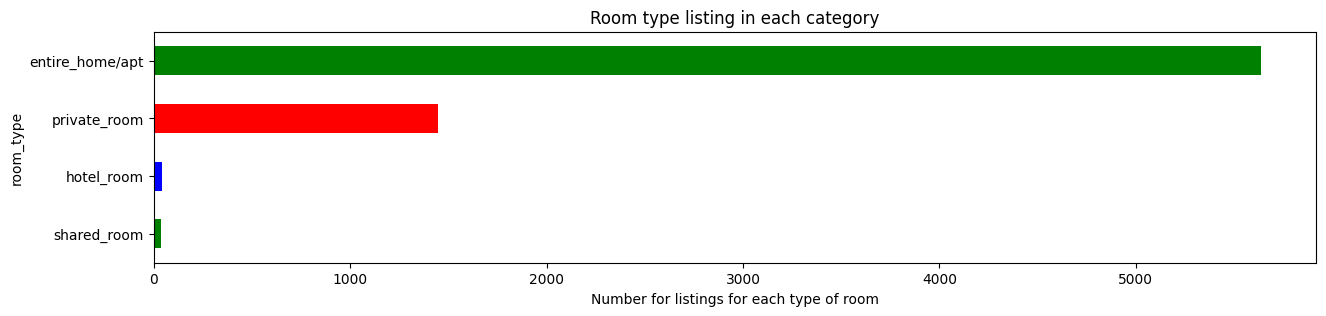

In [111]:
room_fre = df_filter_full_train["room_type"].value_counts().sort_values(ascending=True)
room_fre.plot.barh(figsize=(15,3),width=0.5,color=["g","b","r"])
plt.xlabel("Number for listings for each type of room")
plt.title("Room type listing in each category")
plt.show()

In [112]:
#Entire home/apt has the most listing while shared room and hotel room has hardly booked through airbnb so it has less listings

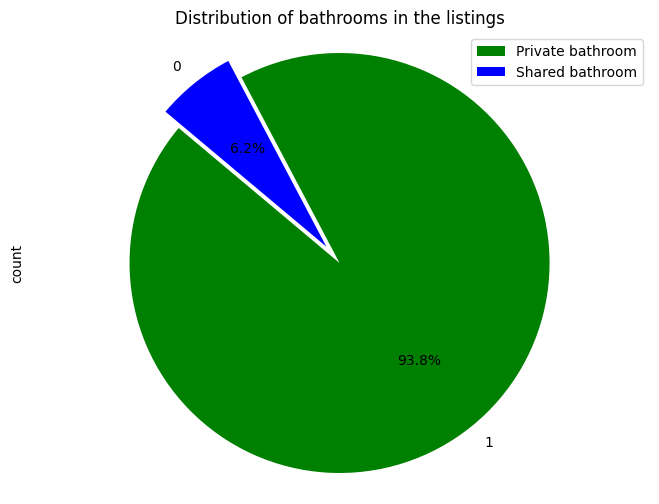

In [113]:
private_counts = df_filter_full_train['private'].value_counts()
plt.figure(figsize=(8, 6))
private_counts.plot.pie(autopct='%1.1f%%', colors=['green', 'blue'], explode=(0, 0.1), startangle=140)
plt.title('Distribution of bathrooms in the listings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(["Private bathroom","Shared bathroom"], loc="best")
plt.show()

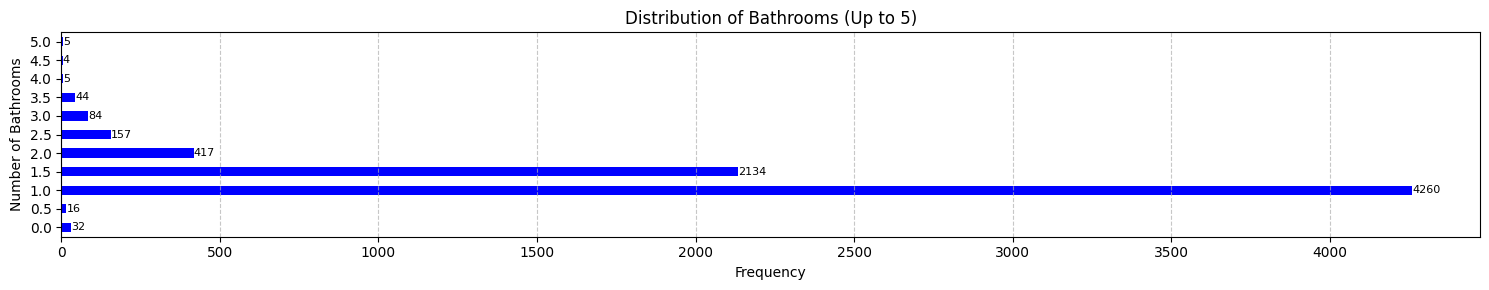

In [114]:
import matplotlib.pyplot as plt

bathroom_counts = df_filter_full_train["bathrooms"].value_counts().sort_index()[:5]

plt.figure(figsize=(15, 3))
bars = bathroom_counts.plot.barh(width=0.5, color="blue")
plt.xlabel('Frequency')
plt.ylabel('Number of Bathrooms')
plt.title('Distribution of Bathrooms (Up to 5)')

for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=8, color='black')

plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()


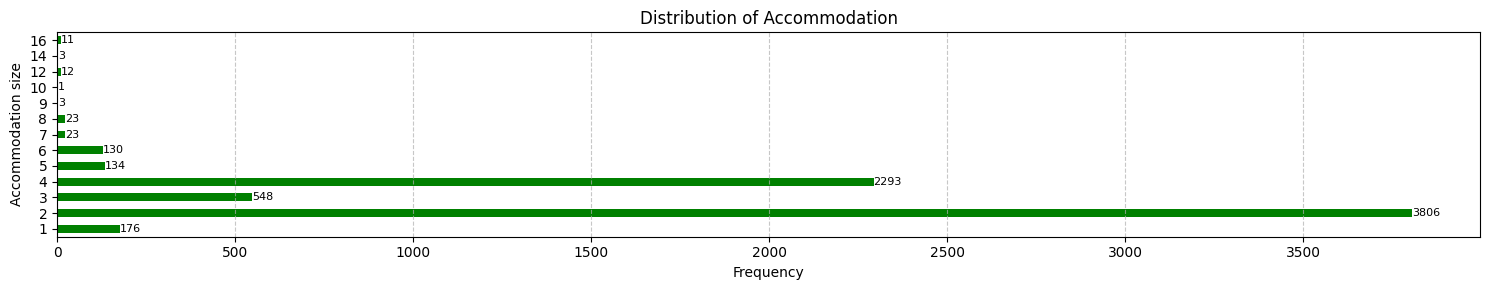

In [115]:
accommodation_counts = df_filter_full_train["accommodates"].value_counts().sort_index()
plt.figure(figsize=(15, 3))
bars = accommodation_counts.plot.barh(width=0.5, color='green')
plt.xlabel('Frequency')
plt.ylabel('Accommodation size')
plt.title('Distribution of Accommodation')

for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=8, color='black')

plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()

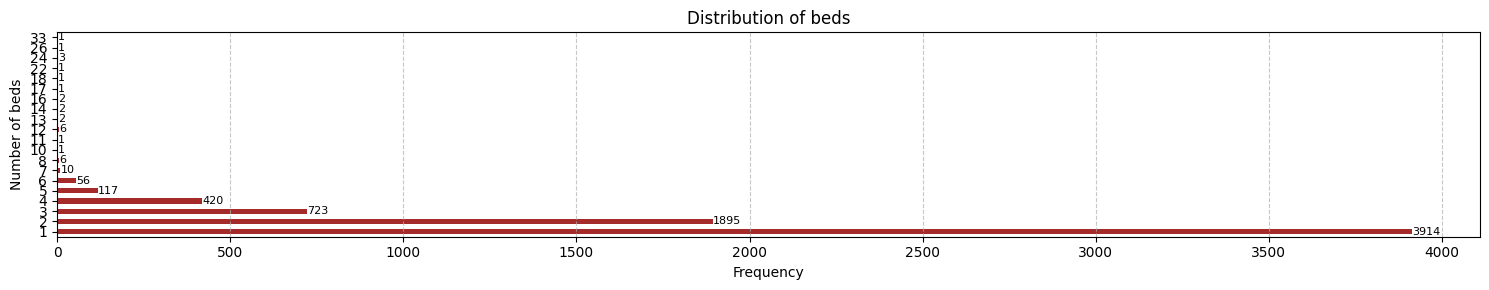

In [116]:
bed_counts = df_filter_full_train["beds"].value_counts().sort_index()
plt.figure(figsize=(15, 3))
bars = bed_counts.plot.barh(width=0.5, color='brown')
plt.xlabel('Frequency')
plt.ylabel('Number of beds')
plt.title('Distribution of beds')

for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', 
             va='center', ha='left', fontsize=8, color='black')

plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.tight_layout()
plt.show()

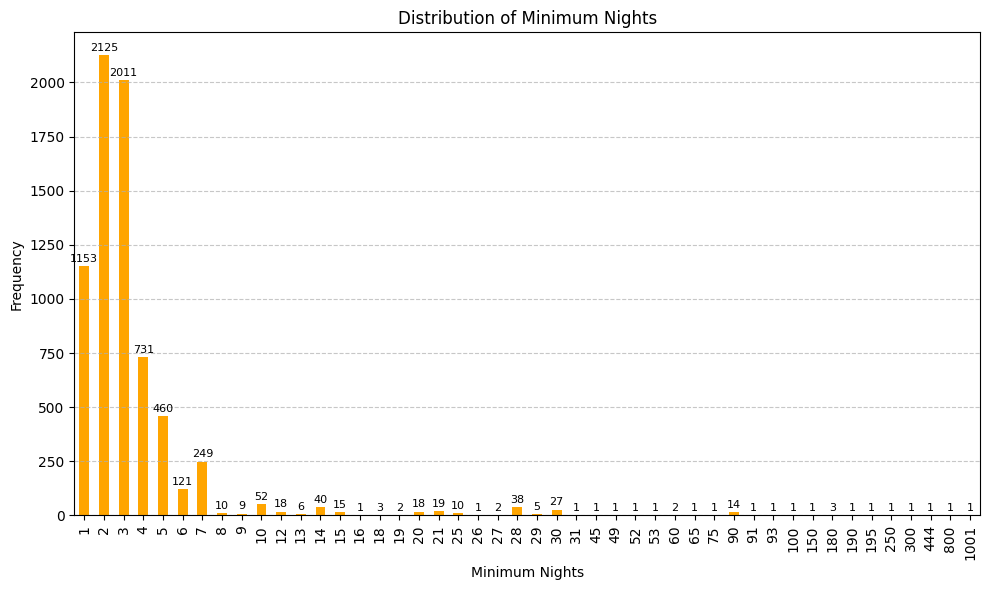

In [117]:
plt.figure(figsize=(10, 6))
ax = df_filter_full_train["minimum_nights"].value_counts().sort_index().plot(kind='bar', color='orange')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.title('Distribution of Minimum Nights')
plt.grid(axis='y', linestyle='--', alpha=0.7) 

for i in ax.patches:
    plt.text(i.get_x() + i.get_width()/2, i.get_height() + 10, str(int(i.get_height())), 
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


In [118]:
#Since the distribution has long tale so all the values greater then 30 are set to 31
df_filter_full_train["minimum_nights"] = df_filter_full_train["minimum_nights"].apply(lambda x: 31 if x > 30 else x)

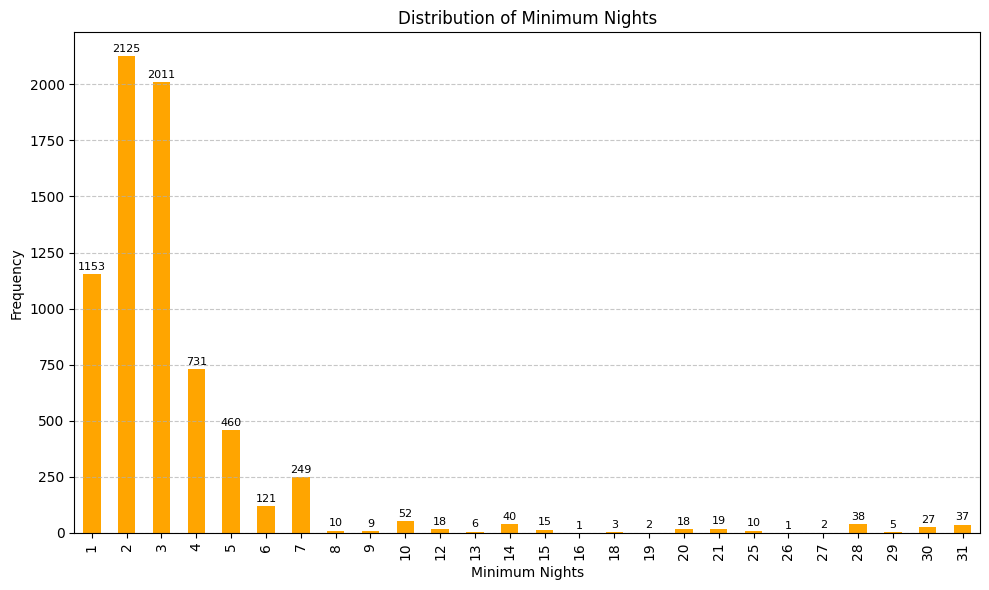

In [119]:
plt.figure(figsize=(10, 6))
ax = df_filter_full_train["minimum_nights"].value_counts().sort_index().plot(kind='bar', color='orange')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.title('Distribution of Minimum Nights')
plt.grid(axis='y', linestyle='--', alpha=0.7) 

for i in ax.patches:
    plt.text(i.get_x() + i.get_width()/2, i.get_height() + 10, str(int(i.get_height())), 
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [120]:
df_filter_full_train.head()

,host_since,host_is_superhost,host_listings_count,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,beds,price,number_of_reviews,review_scores_rating,availability_365,minimum_nights,bathrooms,private
5106,213,f,2,ijburg_-_zeeburgereiland,52.361914,4.988083,entire_home/apt,2,1,160.0,0,4.840493,173,2,1.0,1
5961,3413,f,1,centrum-oost,52.368760,4.928422,entire_home/apt,2,1,240.0,2,5.000000,0,3,1.5,1
7311,3611,f,1,de_baarsjes_-_oud-west,52.364833,4.876748,entire_home/apt,2,1,245.0,6,5.000000,10,2,1.0,1
1213,3198,f,1,oud-oost,52.351616,4.912425,entire_home/apt,3,2,129.0,6,4.670000,52,2,1.0,1
2387,2310,t,4,centrum-west,52.379880,4.884590,private_room,2,1,118.0,214,4.840000,306,1,1.0,1


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '0 night'),
  Text(1, 0, '1 night'),
  Text(2, 0, '2-3 nights'),
  Text(3, 0, '4-7 nights'),
  Text(4, 0, '1-2 weeks'),
  Text(5, 0, '2 weeks to a month'),
  Text(6, 0, '1-3 months'),
  Text(7, 0, 'more than 3months')])

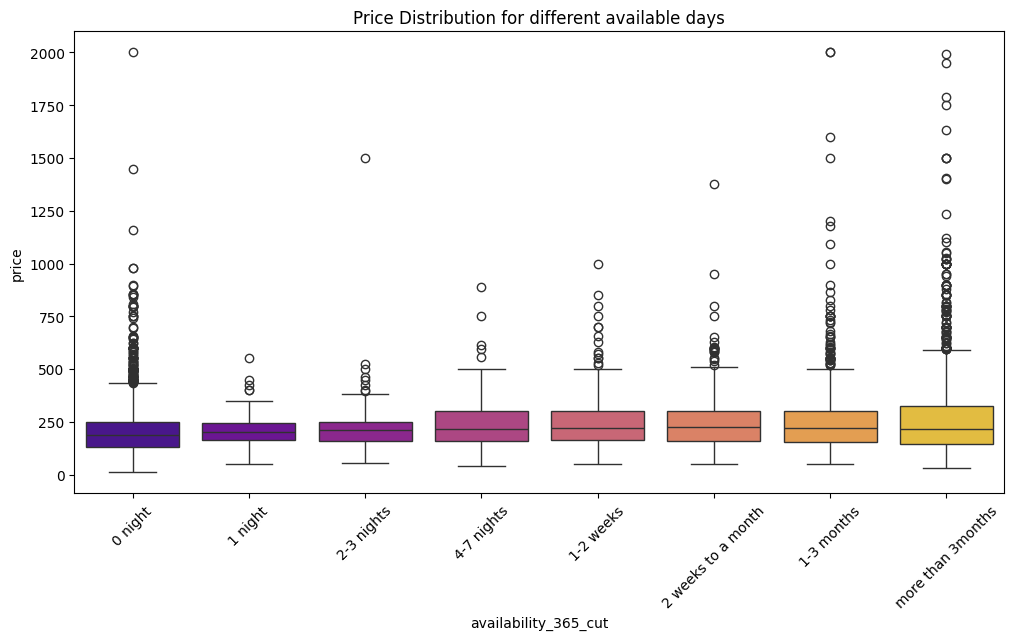

In [135]:
bins = [0,1, 2, 4, 8, 15, 31, 91,float('inf')]  # Adjusted bin edges
labels = ['0 night','1 night', '2-3 nights', '4-7 nights', '1-2 weeks', '2 weeks to a month', "1-3 months", 'more than 3months']
df_filter_full_train['availability_365_cut'] = pd.cut(df_filter_full_train['availability_365'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(12, 6))
sns.boxplot(x='availability_365_cut', y='price', data=df_filter_full_train,palette="plasma")
plt.title('Price Distribution for different available days')
plt.xticks(rotation=45)

In [122]:
#availability have less effect on price

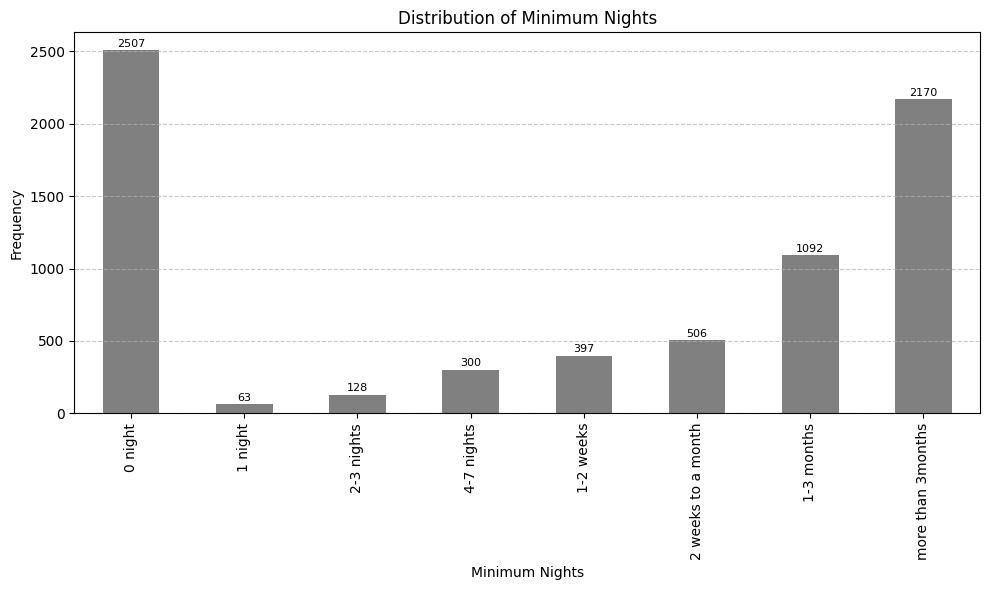

In [123]:
plt.figure(figsize=(10, 6))
ax = df_filter_full_train["availability_365_cut"].value_counts().sort_index().plot(kind='bar', color='grey')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.title('Distribution of Minimum Nights')
plt.grid(axis='y', linestyle='--', alpha=0.7) 

for i in ax.patches:
    plt.text(i.get_x() + i.get_width()/2, i.get_height() + 10, str(int(i.get_height())), 
             ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [124]:
#Surprisingly 30% of the listing on the airbnb have 0 days of availability while 30% has more than 3 months.
#places having availability more than 365 days are set to 365 i.e. year availability
df_filter_full_train["availability_365"] = df_filter_full_train["availability_365"].apply(lambda x: 365 if x > 365 else x)


#### 2.4) Reviews

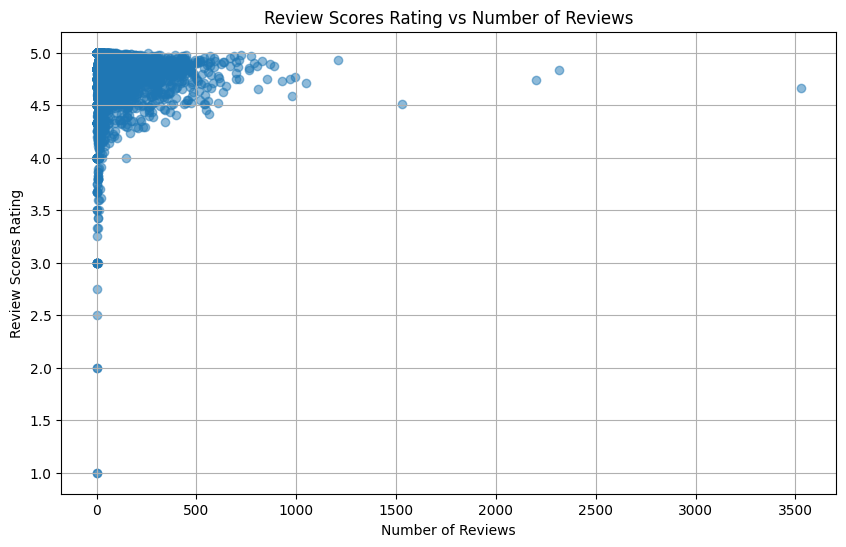

In [125]:
plt.figure(figsize=(10, 6))
plt.scatter(df_filter_full_train['number_of_reviews'], df_filter_full_train['review_scores_rating'], alpha=0.5)
plt.title('Review Scores Rating vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Review Scores Rating')
plt.grid(True)
plt.show()

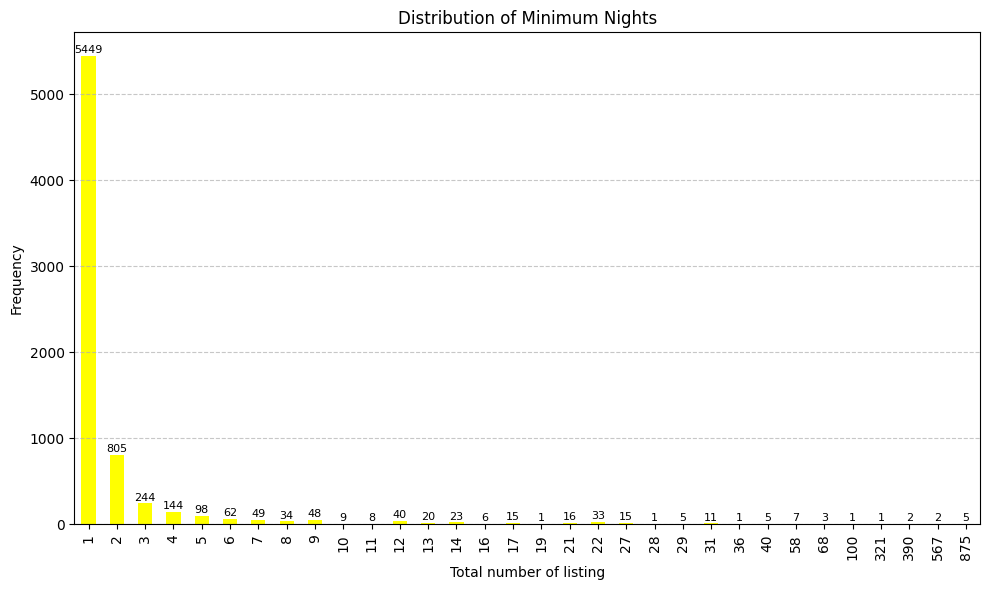

In [127]:
plt.figure(figsize=(10, 6))
ax = df_filter_full_train["host_listings_count"].value_counts().sort_index().plot(kind='bar', color='yellow')
plt.xlabel('Total number of listing')
plt.ylabel('Frequency')
plt.title('Distribution of host listing')
plt.grid(axis='y', linestyle='--', alpha=0.7) 

for i in ax.patches:
    plt.text(i.get_x() + i.get_width()/2, i.get_height() + 10, str(int(i.get_height())), 
             ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

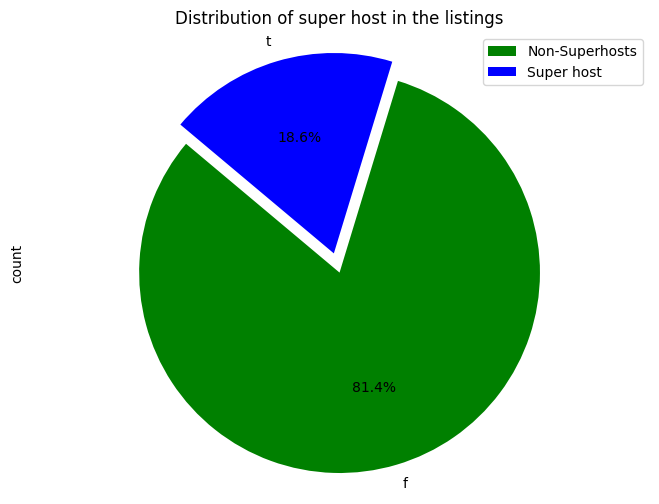

In [132]:
host_counts = df_filter_full_train['host_is_superhost'].value_counts()
plt.figure(figsize=(8, 6))
host_counts.plot.pie(autopct='%1.1f%%', colors=['green', 'blue'], explode=(0, 0.1), startangle=140)
plt.title('Distribution of super host in the listings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(["Non-Super hosts","Super host"], loc="best")
plt.show()

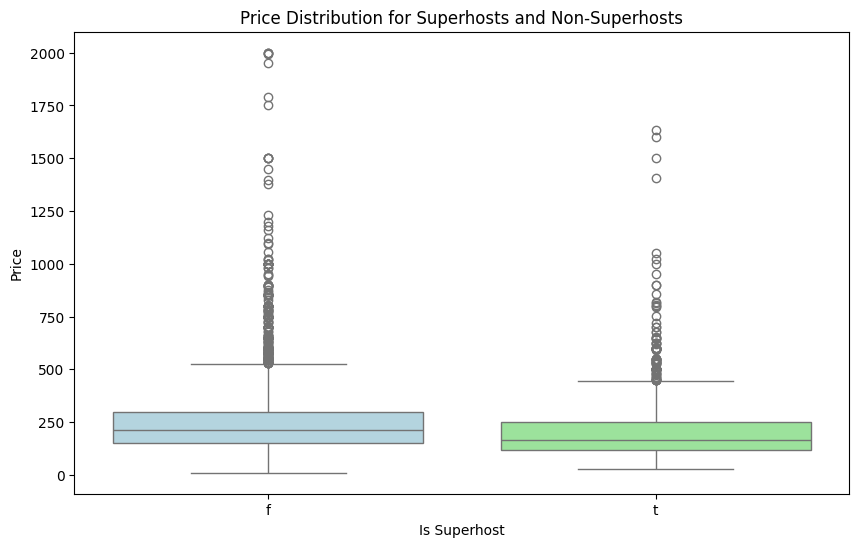

In [133]:
colors = ["lightblue", "lightgreen"]
plt.figure(figsize=(10, 6))
sns.boxplot(x='host_is_superhost', y='price', data=df_filter_full_train, palette=colors)
plt.title('Price Distribution for Superhosts and Non-Superhosts')
plt.xlabel('Is Superhost')
plt.ylabel('Price')
plt.show()

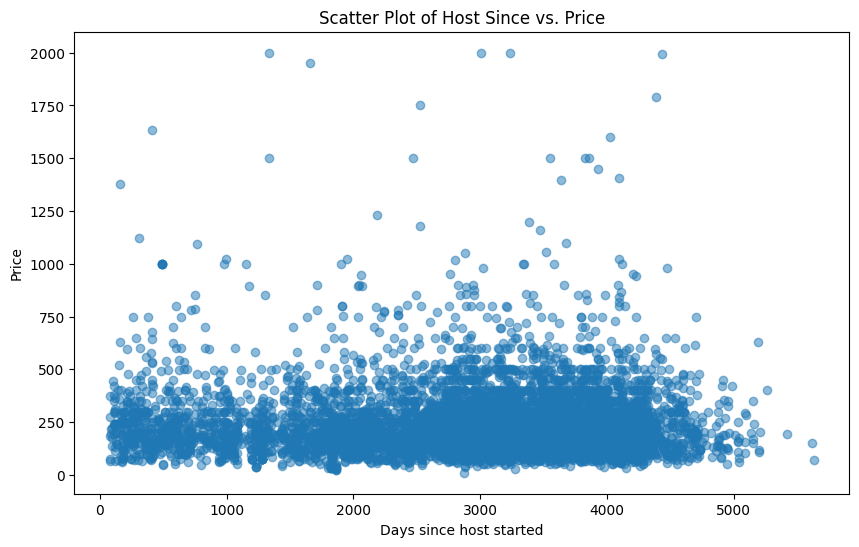

In [130]:
plt.figure(figsize=(10, 6))
plt.scatter(df_filter_full_train['host_since'], df_filter_full_train['price'], alpha=0.5)
plt.title('Scatter Plot of Host Since vs. Price')
plt.xlabel('Days since host started')
plt.ylabel('Price')
plt.show()